# Faraz Ali
## fa06396@st.habib.edu.pk
### Clustering 

### Initialization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mcdonalds = pd.read_csv('McDonaldsMenu.csv')

### Q1

In [ ]:
X = mcdonalds.drop(['Category', 'Item', 'Serving Size'],axis=1)

In [ ]:
null_cols = X.columns[X.isna().any()].tolist()
null_cols

[]

In [ ]:
X.head()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,300,120,13.0,20,5.0,25,0.0,260,87,750,...,31,10,4,17,3,17,10,0,25,15
1,250,70,8.0,12,3.0,15,0.0,25,8,770,...,30,10,4,17,3,18,6,0,25,8
2,370,200,23.0,35,8.0,42,0.0,45,15,780,...,29,10,4,17,2,14,8,0,25,10
3,450,250,28.0,43,10.0,52,0.0,285,95,860,...,30,10,4,17,2,21,15,0,30,15
4,400,210,23.0,35,8.0,42,0.0,50,16,880,...,30,10,4,17,2,21,6,0,25,10


### Q2

In [ ]:
#Serving Size dropped in Q1
# X['Serving Size'] = X['Serving Size'].str.extract(r'([\d.]+) oz')

In [ ]:
# X['Serving Size'] = X['Serving Size'].astype(float)
# X['Serving Size']

### Q3

In [ ]:
scaler = MinMaxScaler()
# transform data
XS = scaler.fit_transform(X)
# XS.head()
XS[1:5]

array([[0.13297872, 0.06603774, 0.06779661, 0.06593407, 0.15      ,
        0.14705882, 0.        , 0.04347826, 0.04166667, 0.21388889,
        0.21333333, 0.21276596, 0.21276596, 0.57142857, 0.60714286,
        0.0234375 , 0.20689655, 0.03529412, 0.        , 0.35714286,
        0.2       ],
       [0.19680851, 0.18867925, 0.19491525, 0.19230769, 0.4       ,
        0.41176471, 0.        , 0.07826087, 0.078125  , 0.21666667,
        0.22      , 0.20567376, 0.21276596, 0.57142857, 0.60714286,
        0.015625  , 0.16091954, 0.04705882, 0.        , 0.35714286,
        0.25      ],
       [0.2393617 , 0.23584906, 0.23728814, 0.23626374, 0.5       ,
        0.50980392, 0.        , 0.49565217, 0.49479167, 0.23888889,
        0.24      , 0.21276596, 0.21276596, 0.57142857, 0.60714286,
        0.015625  , 0.24137931, 0.08823529, 0.        , 0.42857143,
        0.375     ],
       [0.21276596, 0.19811321, 0.19491525, 0.19230769, 0.4       ,
        0.41176471, 0.        , 0.08695652, 0.0833333

### Q4

In [ ]:
wss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, max_iter = 300, random_state = 99)
    kmeans.fit(XS)
    wss.append(kmeans.inertia_)

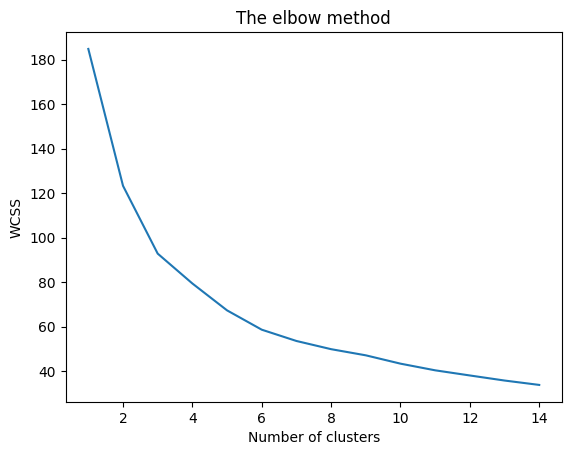

In [ ]:
plt.plot(range(1, 15), wss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

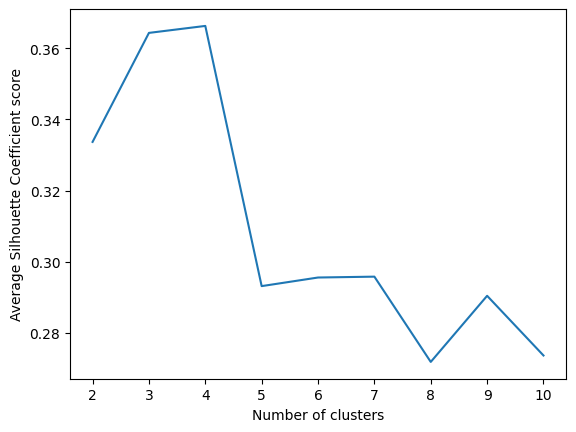

In [ ]:
k_range = range(2, 11)
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, max_iter = 300, random_state = 99).fit(XS)
    score = silhouette_score(XS, kmeans.labels_)
    silhouette_scores.append(score)

plt.plot(k_range, silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette Coefficient score')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-62-22587360374c>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color = plt.cm.get_cmap('Spectral')(float(i) / n_clusters)


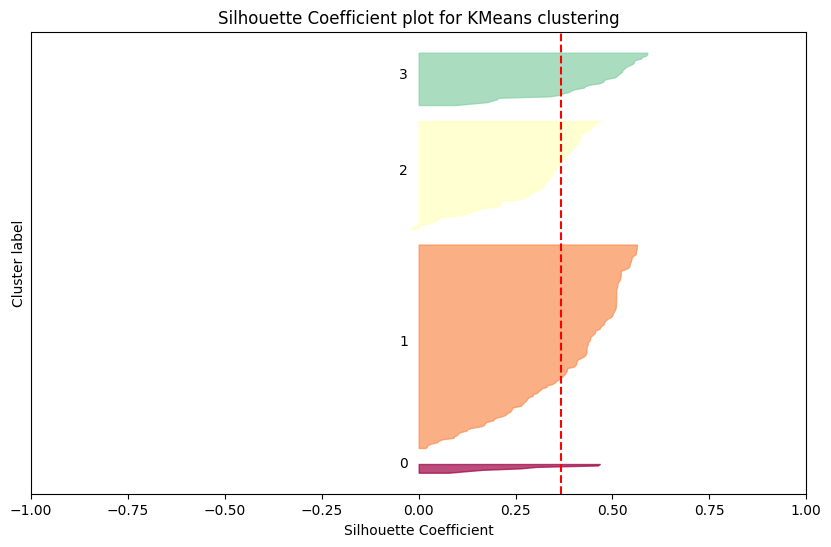

In [ ]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, max_iter = 300, random_state=99).fit(XS)
silhouette_scores = silhouette_samples(XS, kmeans.labels_)
avg_silhouette_score = silhouette_score(XS, kmeans.labels_)
fig, ax = plt.subplots(figsize=(10, 6))
y_lower = 10
for i in range(n_clusters):
    cluster_silhouette_scores = silhouette_scores[kmeans.labels_ == i]
    cluster_silhouette_scores.sort()
    cluster_size = cluster_silhouette_scores.shape[0]
    y_upper = y_lower + cluster_size
    color = plt.cm.get_cmap('Spectral')(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_scores,
                     facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * cluster_size, str(i))
    y_lower = y_upper + 10

ax.set_xlabel('Silhouette Coefficient')
ax.set_ylabel('Cluster label')
ax.axvline(x=avg_silhouette_score, color='red', linestyle='--')
ax.set_yticks([])
ax.set_xlim([-1, 1])
plt.title('Silhouette Coefficient plot for KMeans clustering')
plt.show()

Identifying the optimal number of clusters using only the knee/elbow method was not sufficient since the 'elbow' was not too sharp. I therefore created a plot of avergage silhouette coefficient for a range of possible clusters. The maximum average score was found at near 4, so I decided to go with creating 4 clusters. This was also supported by the elbow method as there is a turn near 4 in the graph.

### Q5

In [ ]:
kmeans = KMeans(n_clusters = 4, max_iter = 300, random_state = 99)
Y = kmeans.fit_predict(XS)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Q6

Text(0.5, 1.0, 'The actual dataset')

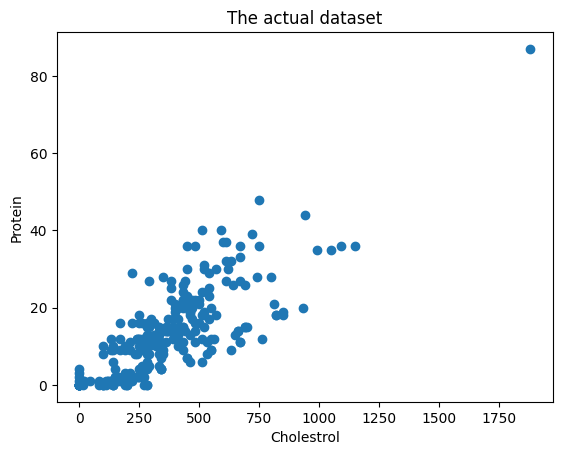

In [ ]:
plt.scatter(x=X['Calories'],y=X['Protein'])
plt.xlabel('Cholestrol')
plt.ylabel('Protein')
plt.title("The actual dataset")

Text(0.5, 1.0, 'The dataset post clustering')

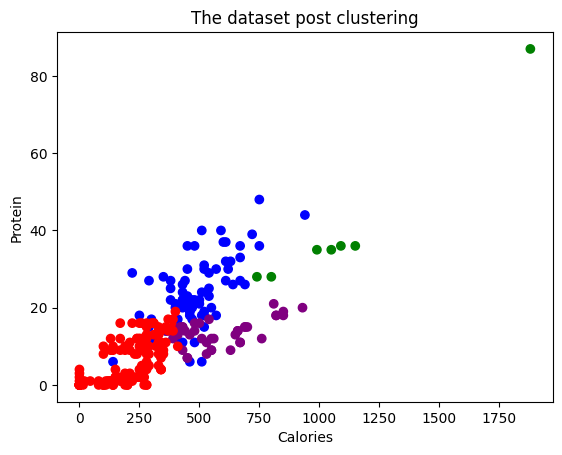

In [ ]:
color2=np.array(['green','red','blue', 'purple'])
plt.scatter(x=X['Calories'],y=X['Protein'],c=color2[kmeans.labels_])
plt.xlabel('Calories')
plt.ylabel('Protein')
plt.title("The dataset post clustering")

### Q7

In [ ]:
C1 = X.iloc[Y == 0, :]
C2 = X.iloc[Y == 1, :]
C3 = X.iloc[Y == 2, :]
C4 = X.iloc[Y == 3, :]

### Q8

<Axes: >

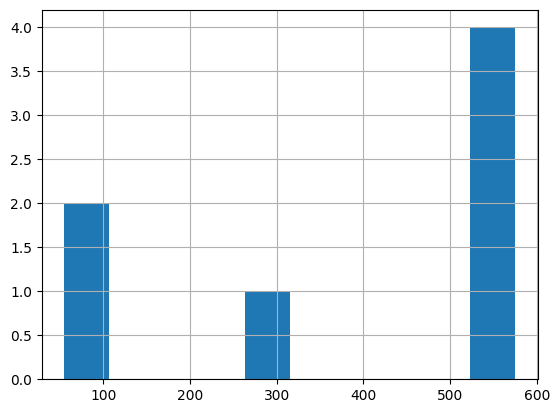

In [ ]:
C1['Cholesterol'].hist()

<Axes: >

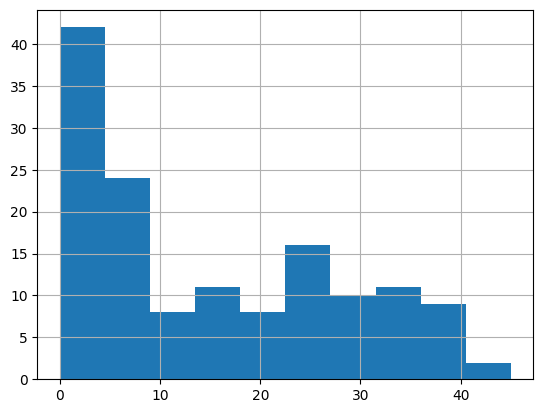

In [ ]:
C2['Cholesterol'].hist()

<Axes: >

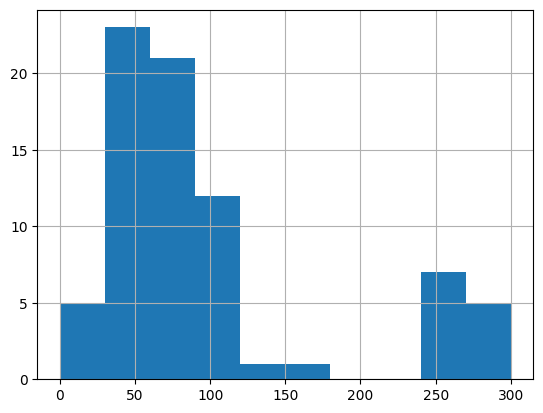

In [ ]:
C3['Cholesterol'].hist()

<Axes: >

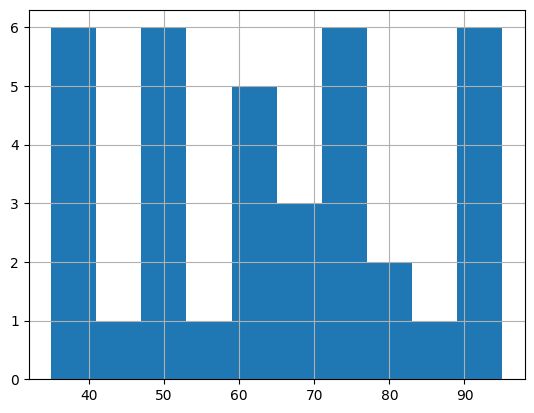

In [ ]:
C4['Cholesterol'].hist()

In [ ]:
C1.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,1100.000000,552.857143,61.428571,94.571429,18.000000,90.428571,0.142857,376.428571,125.857143,2244.285714,...,96.714286,32.285714,5.571429,22.142857,10.857143,40.714286,9.142857,3.857143,20.428571,31.428571
std,375.322084,228.087285,25.395913,39.356732,1.732051,9.034326,0.377964,245.521796,81.589273,663.497228,...,29.685655,9.810102,1.511858,5.814596,8.008924,20.718062,7.425824,4.913538,7.828519,6.267832
min,740.000000,410.000000,46.000000,70.000000,16.000000,78.000000,0.000000,55.000000,19.000000,1560.000000,...,51.000000,17.000000,3.000000,12.000000,1.000000,28.000000,0.000000,2.000000,8.000000,25.000000
25%,895.000000,440.000000,49.000000,75.000000,16.500000,84.000000,0.000000,160.000000,54.000000,1915.000000,...,83.000000,28.000000,5.000000,20.000000,3.000000,31.500000,2.000000,2.000000,15.000000,27.500000
50%,1050.000000,470.000000,52.000000,80.000000,18.000000,90.000000,0.000000,555.000000,185.000000,2170.000000,...,111.000000,37.000000,6.000000,23.000000,17.000000,35.000000,15.000000,2.000000,25.000000,30.000000
75%,1120.000000,525.000000,58.000000,90.000000,19.500000,98.000000,0.000000,565.000000,188.500000,2275.000000,...,115.500000,38.500000,6.500000,26.000000,17.000000,36.000000,15.000000,2.000000,25.000000,35.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,101.000000,1.000000,575.000000,192.000000,3600.000000,...,118.000000,39.000000,7.000000,28.000000,18.000000,87.000000,15.000000,15.000000,30.000000,40.000000


In [ ]:
C2.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.0,141.000000,141.000000,141.000000,...,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,210.000000,42.092199,4.748227,7.304965,2.304965,11.368794,0.0,14.609929,5.021277,148.014184,...,35.943262,11.985816,0.893617,3.503546,29.099291,6.404255,8.035461,10.134752,16.744681,2.475177
std,113.227016,46.337874,5.186392,7.934503,2.525423,12.335438,0.0,14.117756,4.842473,173.271957,...,21.136216,7.078121,1.080358,4.272209,21.853834,5.650510,16.199388,34.443789,17.104888,3.572877
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,140.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,40.000000,...,21.000000,7.000000,0.000000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,230.000000,30.000000,3.500000,5.000000,1.500000,8.000000,0.0,10.000000,3.000000,115.000000,...,38.000000,13.000000,1.000000,3.000000,30.000000,5.000000,4.000000,0.000000,10.000000,0.000000
75%,290.000000,80.000000,9.000000,13.000000,4.500000,22.000000,0.0,25.000000,9.000000,180.000000,...,50.000000,17.000000,1.000000,5.000000,45.000000,11.000000,10.000000,0.000000,30.000000,4.000000
max,410.000000,180.000000,20.000000,30.000000,8.000000,39.000000,0.0,45.000000,16.000000,810.000000,...,79.000000,26.000000,5.000000,22.000000,76.000000,19.000000,170.000000,240.000000,60.000000,15.000000


In [ ]:
C3.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,...,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,486.533333,220.266667,24.473333,37.733333,8.706667,43.613333,0.313333,96.200000,32.013333,1122.266667,...,43.146667,14.386667,3.013333,12.053333,7.613333,23.746667,21.186667,10.173333,17.453333,17.053333
std,132.853235,81.505651,9.144816,14.074448,3.752561,18.728424,0.550020,81.168993,27.123089,339.317970,...,11.599969,3.858628,1.120971,4.770102,5.219230,9.125393,37.793426,11.694736,7.765644,5.744312
min,140.000000,40.000000,4.500000,7.000000,2.000000,9.000000,0.000000,0.000000,0.000000,150.000000,...,8.000000,3.000000,1.000000,5.000000,0.000000,2.000000,0.000000,0.000000,2.000000,6.000000
25%,425.000000,180.000000,20.000000,31.000000,6.000000,31.000000,0.000000,45.000000,14.500000,905.000000,...,35.000000,12.000000,2.000000,8.000000,3.000000,18.000000,4.000000,2.000000,15.000000,15.000000
50%,470.000000,220.000000,24.000000,37.000000,9.000000,44.000000,0.000000,70.000000,23.000000,1180.000000,...,42.000000,14.000000,3.000000,12.000000,7.000000,22.000000,8.000000,8.000000,15.000000,15.000000
75%,545.000000,275.000000,30.500000,47.000000,11.500000,57.500000,0.500000,105.000000,34.500000,1330.000000,...,50.500000,17.000000,3.000000,14.000000,10.500000,29.500000,10.000000,15.000000,22.500000,20.000000
max,940.000000,530.000000,59.000000,91.000000,19.000000,96.000000,2.500000,300.000000,100.000000,1800.000000,...,68.000000,23.000000,7.000000,28.000000,32.000000,48.000000,170.000000,70.000000,30.000000,35.000000


In [ ]:
C4.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,...,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.0,37.000000,37.000000
mean,593.243243,181.621622,20.216216,31.081081,12.378378,61.729730,0.770270,64.189189,21.405405,220.135135,...,89.972973,29.945946,0.891892,3.918919,78.378378,13.486486,19.054054,0.0,44.324324,4.405405
std,149.463003,47.755949,5.218211,8.101366,3.311188,16.992888,0.401293,18.047527,5.856902,68.814227,...,26.349664,8.787447,0.698561,2.994239,21.727289,3.556072,5.507298,0.0,12.481217,3.692782
min,390.000000,120.000000,14.000000,21.000000,8.000000,39.000000,0.000000,35.000000,11.000000,120.000000,...,55.000000,18.000000,0.000000,0.000000,50.000000,7.000000,10.000000,0.0,20.000000,0.000000
25%,460.000000,150.000000,16.000000,25.000000,10.000000,49.000000,0.500000,50.000000,17.000000,180.000000,...,65.000000,22.000000,0.000000,0.000000,59.000000,11.000000,15.000000,0.0,35.000000,2.000000
50%,550.000000,170.000000,19.000000,29.000000,12.000000,60.000000,1.000000,60.000000,21.000000,210.000000,...,86.000000,29.000000,1.000000,4.000000,71.000000,14.000000,20.000000,0.0,45.000000,4.000000
75%,690.000000,210.000000,23.000000,35.000000,15.000000,73.000000,1.000000,75.000000,25.000000,260.000000,...,109.000000,36.000000,1.000000,6.000000,93.000000,15.000000,20.000000,0.0,50.000000,8.000000
max,930.000000,290.000000,33.000000,50.000000,20.000000,102.000000,1.500000,95.000000,32.000000,400.000000,...,141.000000,47.000000,2.000000,10.000000,128.000000,21.000000,30.000000,0.0,70.000000,15.000000


The first cluster i.e. C1 tends to have a very high overall average Calories meal. It makes sense that the model grouped together similar meals that had high calories. The second highest average calories were for C4 at ≈ 593 with C3 sitting at 486 and C2 at 210. I saw a very strange relation between cholesterol and the total calories that were there in each cluster. I initially assumed that the more the average calories a cluster has, the more average cholesterol it is suppose to have. However, this was not true for cluster number 4 where even though the average calories were second highest amongst all clusters, the mean cholesterol sits at third rank when ranked highest to lowest at ≈ 64 while the cluster 3 with lower mean of calories had a higher average for cholesterol at ≈ 96. The sugar levels were also very strange in each cluster. Surprisingly, Cluster 4 had the highest number of average sugar levels. From what I think, cluster 4 mainly has Desserts and Beverages.

### Q9

Cluster 1 can be named: 'CholesterolIntesive'

Cluster 2 can be named: 'CholesterolLight'

Cluster 3 can be named: 'CholesterolLowtoMid'

Cluster 4 can be named: 'CholesterolMediocre'